## Exploration on USGS Wind Turbine Data
### *This notebook explores the variables of the turbine to see the impact of turbine parameters on power generation*

In [44]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [8]:
usgs_data = pd.read_csv('./uswtdbCSV/uswtdb_v1_1_20180710.csv')
usgs_ge_data = usgs_data[usgs_data["t_manu"] == "GE Wind"]
usgs_ge_data = usgs_ge_data.replace(to_replace=-9999, value=np.nan)
print(usgs_ge_data.shape)

(22183, 24)


In [9]:
print(usgs_ge_data[usgs_ge_data["case_id"] == 3001226])

       case_id  faa_ors  faa_asn  usgs_pr_id t_state         t_county  t_fips  \
28050  3001226  missing  missing     30367.0      TX  Mitchell County   48335   

                  p_name  p_year  p_tnum    ...      t_hh  t_rd    t_rsa  \
28050  Loraine Wind Park     NaN      66    ...      80.0  82.5  5345.62   

       t_ttlh  t_conf_atr  t_conf_loc  t_img_date  t_img_srce       xlong  \
28050   121.3           3           2    1/1/2012        NAIP -100.692696   

            ylat  
28050  32.428493  

[1 rows x 24 columns]


In [10]:
col_mapping = {"p_year":"Project Year", "p_tnum":"Project Turbine Count",
               "p_cap":"Project Total Capacity", "t_cap":"Turbine Rated Capacity",
               "t_hh":"Turbine Hub Height", "t_rd":"Turbine Rotor Diameter",
               "t_rsa":"Turbine Rotor Swept Area", "t_ttlh":"Turbine Total Height",
               "t_fips": " Turbine FIPS(State & County)", "":""}

Project Level
-------------

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 6th Space Warning Squadron to Yahoo Creek
Data columns (total 3 columns):
p_year    414 non-null int32
p_tnum    414 non-null int64
p_cap     414 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 11.3+ KB


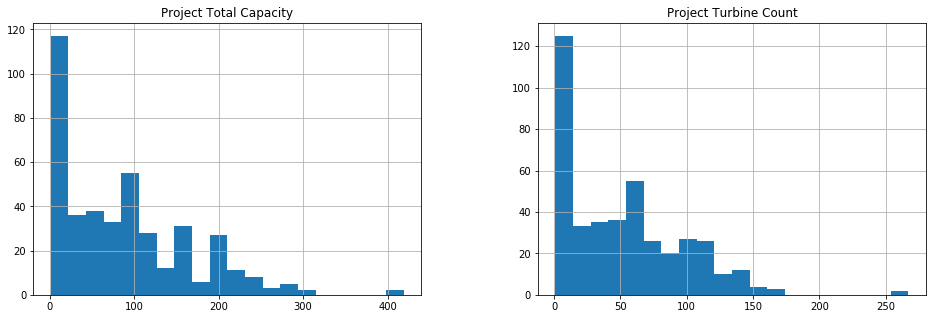

In [11]:
ge_projects_df = usgs_ge_data.groupby("p_name")[["p_year", "p_tnum", "p_cap"]].agg("max")
#.agg(lambda x: stats.mode(x)[0][0])
ge_projects_df.dropna(inplace=True)
ge_projects_df["p_year"] = ge_projects_df["p_year"].astype(int)
ge_projects_df.info()
ge_projects_df.reset_index(inplace=True)
#ge_projects_df[ge_projects_df["p_name"] == "Capricorn Ridge"]

ax = ge_projects_df.hist(column=["p_tnum", "p_cap"], figsize=(16, 5), bins=20)

for subplot in ax[0]:
    subplot.set_title(col_mapping[subplot.get_title()])

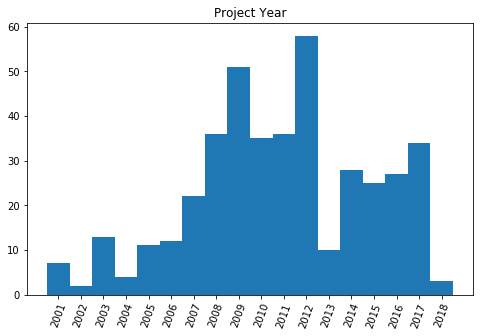

In [12]:
plt.figure(figsize=(8,5))
plt.hist(ge_projects_df["p_year"], bins=np.arange(2001,2020)-0.5)
plt.xticks(range(ge_projects_df["p_year"].unique().min(), ge_projects_df["p_year"].unique().max()+1), rotation=70)
plt.title("Project Year")
plt.show()

Turbine Level
--------------

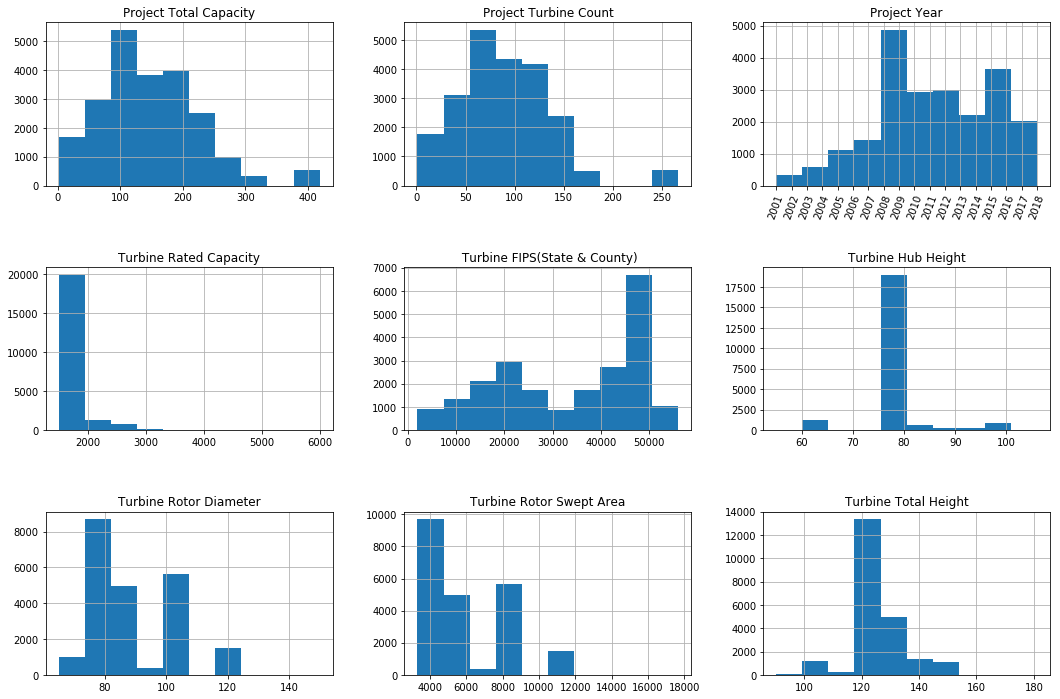

In [13]:
ax = usgs_ge_data.hist(column=["p_year", "p_tnum", "p_cap", "t_cap", "t_hh", "t_rd", "t_rsa", "t_ttlh", "t_fips"],
                       figsize=(18, 12))

plt.subplots_adjust(wspace=.25, hspace=.5)

for i in range(3):
    row = ax[i]
    for subplot in row:
        subplot.set_title(col_mapping[subplot.get_title()])
        if subplot.get_title() == "Project Year":
            subplot.set_xticks(range(ge_projects_df["p_year"].unique().min(), ge_projects_df["p_year"].unique().max()+1))
            plt.setp(subplot.xaxis.get_majorticklabels(), rotation=70)

In [50]:
usgs_ge_data["t_rd"].value_counts()

77.0     8681
100.0    4336
82.5     3224
87.0     1765
116.0    1489
103.0     968
70.5      959
91.0      366
107.0     345
65.0       41
150.0       5
120.0       3
Name: t_rd, dtype: int64

In [51]:
usgs_ge_data["t_hh"].value_counts()

80.0     18970
65.0      1202
85.0       656
100.0      655
94.0       260
90.0       209
96.0       182
55.0        20
98.3        14
56.5         5
106.0        5
91.7         2
64.7         2
Name: t_hh, dtype: int64

In [14]:
usgs_ge_data["t_state"].value_counts()

TX    6178
OK    1662
KS    1452
CO    1361
IL    1360
IA    1317
MN    1039
ND     932
CA     850
OR     762
MI     651
NY     593
WY     585
NE     486
IN     463
SD     380
PA     307
ID     269
NM     214
MO     202
WA     197
MT     186
ME     149
WI     143
UT     135
WV     128
AZ      62
HI      48
MA      35
AK      18
NJ       5
RI       5
NH       5
CT       2
OH       2
Name: t_state, dtype: int64

In [15]:
usgs_ge_data["t_county"].value_counts().head(20)

Nolan County        688
Kern County         521
Lincoln County      520
Sterling County     447
Logan County        444
Gilliam County      411
Carson County       406
Scurry County       385
Webb County         383
Wyoming County      372
Converse County     336
DeKalb County       328
Harper County       283
Huron County        283
Castro County       282
Glasscock County    261
Dewey County        261
Haskell County      255
Ford County         239
Jackson County      236
Name: t_county, dtype: int64

In [16]:
usgs_ge_data["p_name"].value_counts().head(20)

Capricorn Ridge                           342
Horse Hollow                              274
Peetz Table                               267
Flat Ridge 2                              261
Pyron (Roscoe III)                        166
Jumbo Road                                162
Balko Wind                                162
Miami                                     156
Buffalo Gap, phase II                     155
Wake                                      150
Palo Duro                                 147
Golden West Wind Farm                     145
Lee/DeKalb                                145
Chisholm View                             140
Fenton                                    137
Lakefield (phase I)                       137
New Mexico Wind Energy Center (Taiban)    136
Buffalo Dunes                             135
Ashtabula Wind Center                     135
Nobles                                    134
Name: p_name, dtype: int64

In [17]:
usgs_ge_data["t_model"].value_counts().head(20)

GE1.5-77       8561
GE1.5-82.5     1505
GE1.79-100     1449
GE1.6-82.5     1332
GE1.7-100      1317
GE1.85-87      1064
GE1.5-70.5      935
GE1.6-100       824
GE2.3-116       719
GE1.715-103     586
GE1.5-87        446
GE2.0-116       392
GE1.62-100      384
GE2.5-100       338
GE1.5-91        314
GE2.4-107       275
GE1.7-103       270
GE1.68-82.5     262
GE1.6-87        236
GE2.5-116       209
Name: t_model, dtype: int64

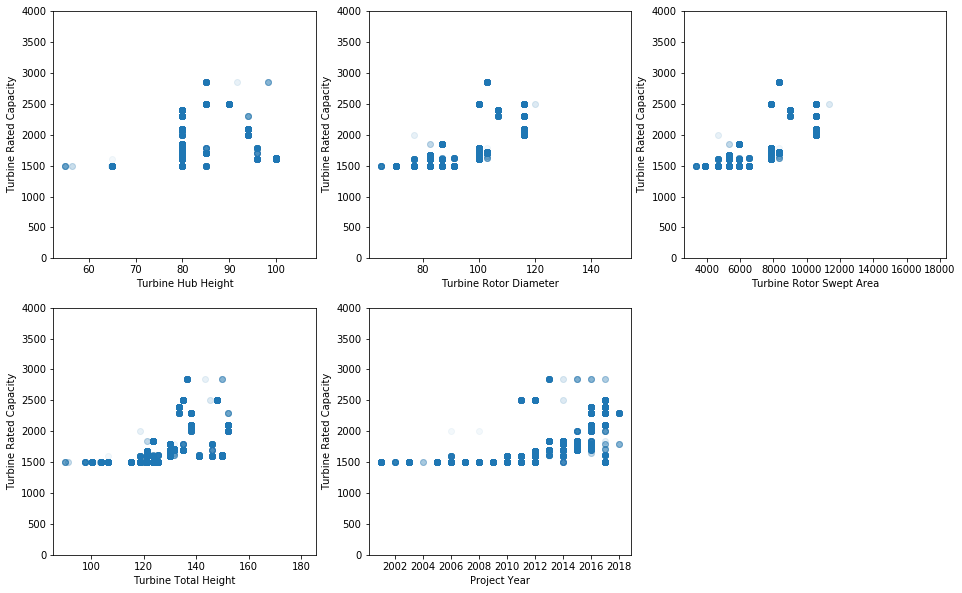

In [43]:
fig = plt.figure(figsize=(16,10))
feature_list = ["t_hh", "t_rd", "t_rsa", "t_ttlh", "p_year"]
subplots = []

for i in range(1, 6):
    subplots.append(fig.add_subplot(2,3,i))
                    
for ax, feature in zip(subplots, feature_list):
    ax.scatter(usgs_ge_data[feature], usgs_ge_data["t_cap"], c="#1f77b4", alpha=.05)
    ax.set_ylabel("Turbine Rated Capacity")
    ax.set_xlabel(col_mapping[feature])
    ax.set_ylim(0, 4000)
    if feature == "p_year":
        ax.set_xticks(range(2002, 2020, 2))

plt.show()

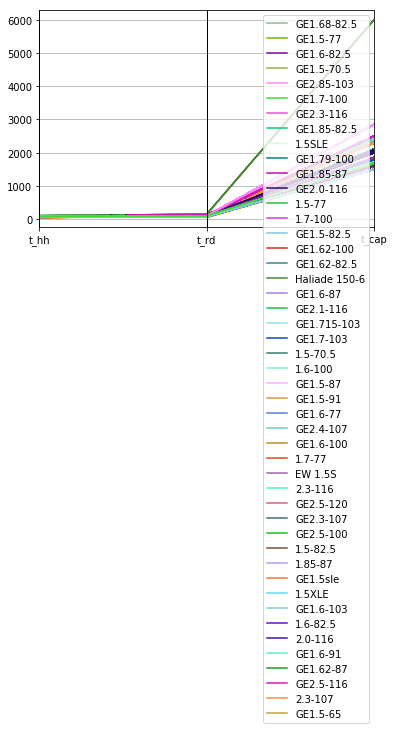

In [49]:
plt.figure()
parallel_coordinates(usgs_ge_data, "t_model", cols=["t_hh", "t_rd", "t_cap"], axvlines=True)